## import packages

In [2]:
from Utils.Models import *  
from Utils.Densenet import *
from ultralytics import YOLO
# 设置默认字体为黑体
plt.rcParams['font.family'] = ['WenQuanYi Zen Hei']  # 黑体
# 或者设置能够支持中文的其他字体名称
# plt.rcParams['font.family'] = ['SimSun']  # 宋体

# 对于负号显示问题，确保正常显示
plt.rcParams['axes.unicode_minus'] = False

2024-06-20 17:08:41.710592: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
import os
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

## import Data

In [3]:
Property = [1,0]
Property = [0.3,0.7]
# Property = [0,1]
seed = 54
map_lenght = 25
zmax = 512

X = np.linspace(-map_lenght, map_lenght, zmax)
Y = np.linspace(-map_lenght, map_lenght, zmax)
read_dir = "/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/bishedata_4000_data_500_noise_0.3_0.7"
parameter, num_of_dipoles,kind_of_data, bbox,data,gass_id,n_of_each = read_data(read_dir,'parameter', 'num_of_dipoles','kind_of_data', 'bbox','data','gass_id','n_of_each')

In [4]:
bbox[0,0]

array([    -18.425,       -5.95,         4.7,        4.05])

In [5]:
gass_id

array([2204, 3095, 2188, 1293, 1513,  711, 2800, 1242, 1006,  909, 2889, 1252, 1910, 2241,   48, 3779, 2088, 3789, 2835, 1840, 3659,  606, 2995, 3195, 2795, 2363, 3392, 3531, 1758, 2651, 1590, 2491,  281, 2082,  262, 3170, 3005, 1188, 2416, 2703, 2551, 2283, 2865, 3999, 2668, 3140, 3653, 2840, 1926,  119, 2338,  406,
        160,  567, 1054,  873, 3539, 3815, 1411, 1666, 1948, 3842, 1113, 1965, 3943, 1912, 3426,  738,  876,   58, 1770,  858, 2162, 3858,  360, 1129, 3186, 1326,  871, 3867, 1779,  299, 3964, 3396, 2896, 3270, 3631,  120, 1754,  162, 1637, 3742, 3200,  575,  789, 1098,  325, 3596, 1634,  390, 1204, 3342, 2780, 3175,
        730, 3213,  768, 2065, 3829,  197, 3162, 1316,   16,  622,   56,  504, 1990, 2593, 2933,  339, 2227, 2812,  722,  977,  492, 1286, 1413, 1182, 2343, 2763, 3305, 2214,  784, 2019,   11,  547, 2565,  519, 3841, 1429,  767, 3156, 1822, 1121, 1340, 1406,  915,  839, 3994, 2185, 2881, 2820, 1920,  285, 3001, 1855,
        863, 3878, 2523,  292, 3661, 3131, 

In [6]:
n_of_each

array([ 5471, 12797])

Dipole_0: x0: -16.6, y0: 12.7, w: 4.7, h:4.1
Dipole_1: x0: 6.8, y0: 14.5, w: 4.7, h:4.1
Dipole_0: x0: 17.6, y0: -6.1, w: 5.9, h:4.4
Dipole_1: x0: 19.4, y0: -4.1, w: 4.7, h:4.0
Dipole_2: x0: 0.2, y0: -3.1, w: 5.9, h:4.4
Dipole_3: x0: 3.2, y0: -3.7, w: 5.9, h:4.4
Dipole_4: x0: -20.8, y0: -22.3, w: 5.9, h:4.4


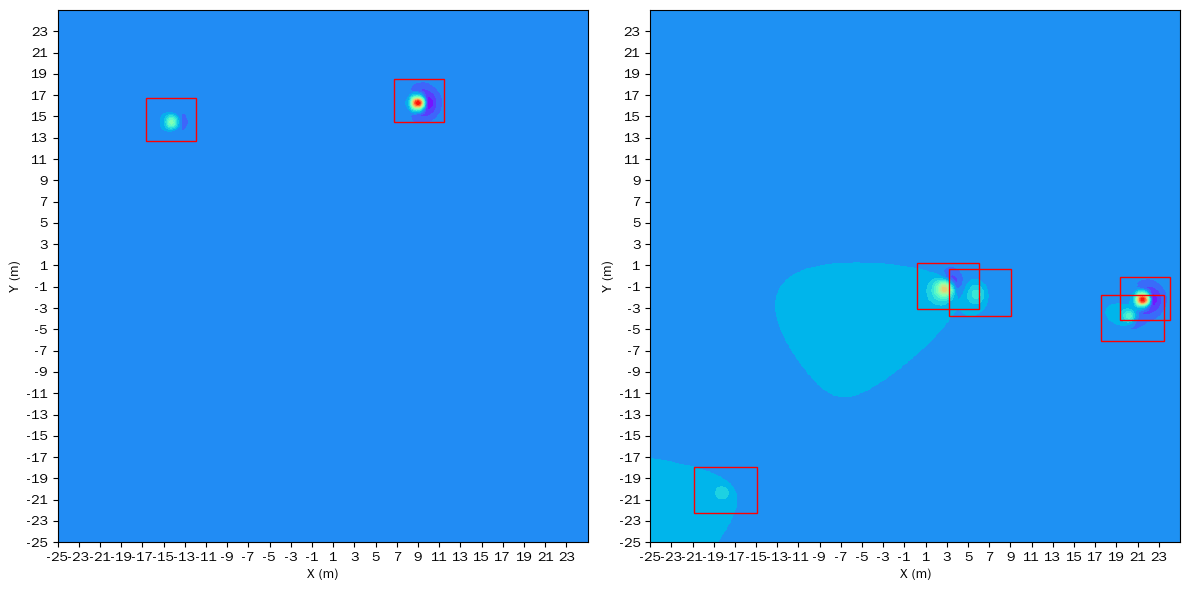

In [7]:
Plot_X_data(num_of_dipoles, bbox, data, map_lenght=25, num=2)

Dipole_0: x0: -22.6, y0: -5.5, w: 5.9, h:4.4
Dipole_1: x0: -11.8, y0: -16.9, w: 5.9, h:4.4
Dipole_2: x0: -15.4, y0: -14.3, w: 4.7, h:4.1
Dipole_3: x0: 21.2, y0: 4.9, w: 3.8, h:4.0
Dipole_4: x0: 4.4, y0: -17.5, w: 5.9, h:4.4
Dipole_5: x0: -13.6, y0: 13.9, w: 4.7, h:4.1
Dipole_0: x0: -21.4, y0: 8.3, w: 5.9, h:4.4
Dipole_1: x0: 1.4, y0: -25.0, w: 5.9, h:2.9
Dipole_2: x0: -20.8, y0: 12.5, w: 5.9, h:4.4


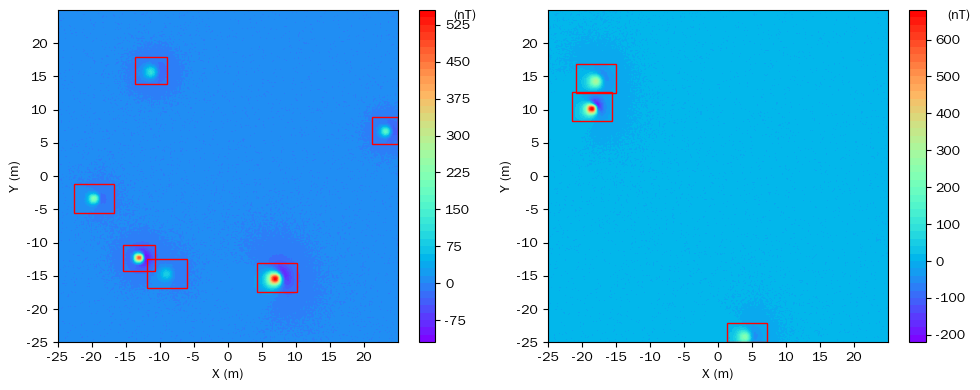

In [8]:
Plot_X_data_with_noise(num_of_dipoles, bbox, data, gass_id, map_lenght=25, num=2)

## train YOLO

In [9]:
model = YOLO('yolov8n.yaml').load('yolov8n.pt')


Transferred 355/355 items from pretrained weights


In [10]:
results = model.train(data='/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/bishedata_4000_data_500_noise_0.3_0.7/test.yaml', epochs=20)

New https://pypi.org/project/ultralytics/8.2.36 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.9.18 torch-2.2.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/jiajianhao/文档/cnn/my_Magnetic_methods-master/data/bishedata_4000_data_500_noise_0.3_0.7/test.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=F


KeyboardInterrupt



## train Densenet

### 全部训练集处理

In [11]:
den_data = cov_to_densenet(parameter, num_of_dipoles, bbox,data)
den_data.shape

(4000, 9, 64, 64)

In [12]:
def plot_densenet_data(den_data, map_lenght=25/8):
    zmax = den_data.shape[-1]

    xmin = -map_lenght
    xmax = map_lenght
    ymin = -map_lenght
    ymax = map_lenght

    X = np.linspace(xmin, xmax, zmax)
    Y = np.linspace(ymin, ymax, zmax)

    # Adjust the size of your images
    plt.figure(figsize=(10, 4))

    # Iterate and plot random images 迭代 绘制随机图像
    for i in range(2):

        n_p = int(np.random.randint(0, den_data.shape[0], 1))

        plt.subplot(1,2, i + 1)
        plt.contourf(X, Y, den_data[n_p, 0, :, :], levels=40, cmap='rainbow')
        plt.axis('on')
        plt.xlabel('X (m)')
        plt.ylabel('Y (m)')
        clb = plt.colorbar()
        clb.set_label('(nT)',loc="top", rotation=360)

    # Adjust subplot parameters to give specified padding
    plt.tight_layout()

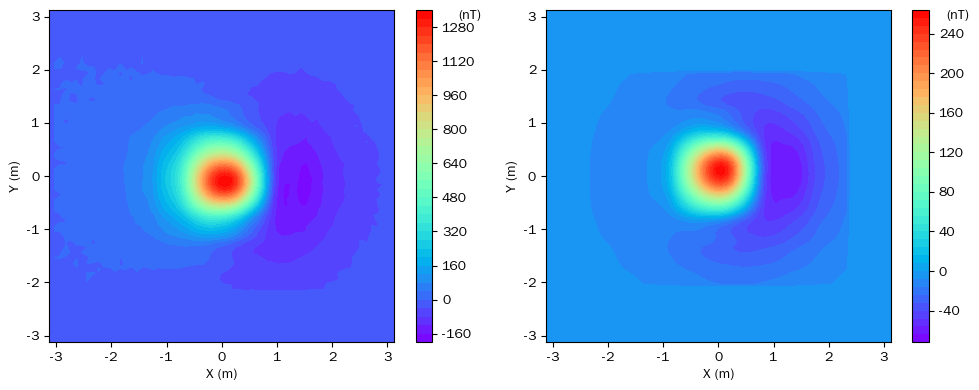

In [13]:
plot_densenet_data(den_data)

In [14]:
data,para = fliter_acdt_type(n_of_each, parameter, num_of_dipoles,den_data, kind_of_data)

In [15]:
dipole_data,ellipse_data = data['0'],data['1']
dipole_para,ellipse_para = para['0'],para['1']

In [16]:
dipole_data_img = gray_to_rgb(dipole_data)
ellipse_data_img = gray_to_rgb(ellipse_data)

### 球体train

In [17]:
# 球体训练集
train_data, train_para, val_data, val_para, test_data, test_para = split_data(dipole_data_img,dipole_para)
train_data.shape

(3829, 64, 64, 3)

In [18]:
# 仅使用深度和半径参数
train_para,val_para,test_para = para_select(2,4,train_para,val_para,test_para)

In [1]:
Densenet_121 = tf.keras.applications.DenseNet121(
                                                include_top=False,  # 不包括全连接层, 可能主要用于提取特征, 而不分类
                                                weights="imagenet",  # 通过imagNet预训练
                                                input_tensor=None,
                                                input_shape=dipole_data_img.shape[1:],
                                                pooling=None,  # 不采用平均池化
                                                classes=1000, 
                                                )

# Densenet_121.summary()


NameError: name 'tf' is not defined

In [17]:
nb_dense_block=0 
growth_rate=32
nb_filter=256
reduction=0.0
dropout_rate=0.0
weight_decay=1e-4

nb_layers = [6,12]

compression = 0.5

l2_regularizer = 0.005

####################

x = Densenet_121.layers[140].output

for block_idx in range(nb_dense_block):

  stage = block_idx+4
  x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

  # Add transition_block
  x = transition_block(x, stage, nb_filter, compression=compression, dropout_rate=dropout_rate, weight_decay=weight_decay)
  nb_filter = int(nb_filter * compression)

#final_stage = stage + 1
#x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

x = GlobalAveragePooling2D(name='Global_Average_Pooling_2D')(x)

x = Dense(256, kernel_initializer='GlorotUniform', kernel_regularizer=l2(l2_regularizer))(x)
x = Activation("relu")(x)

x = Dense(train_para.shape[1], activation= "linear", name='rotation')(x)

model = Model(inputs = Densenet_121.input, outputs = x)

for layer in model.layers[:141]:
#for layer in position_model.layers[:9]:
  layer.trainable=True
for layer in model.layers[141:]:
#for layer in position_model.layers[9:]:
  layer.trainable=True

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [18]:
model.compile(optimizer = Adam(learning_rate = 1e-5), 
              loss= MSE,
              metrics= [r2])

In [14]:
os.getcwd()

'/home/jiajianhao/文档/cnn/my_Magnetic_methods-master'

In [15]:
%%time

# 
path = 'content/my_Densenet_par_9_TL_dipoles.hdf5'

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", patience=15, verbose=0)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(path, monitor="val_loss", verbose=0, save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode="min",
                                                         patience=10, min_lr=0.00001, verbose=1)

####### Training #####
# train_data, train_para, val_data, val_para, test_data, test_para = split_data(dipole_data_img,dipole_para)

model.fit(train_data, train_para, validation_data=(val_data, val_para), batch_size=32, epochs=70, 
             callbacks=[earlystopping, reduce_lr, model_checkpoint])
                                                        


2024-04-14 13:41:28.536773: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-04-14 13:41:28.537388: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499780000 Hz


Epoch 1/70


2024-04-14 13:41:32.686693: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-04-14 13:41:33.508364: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


120/120 [==============================] - 14s 43ms/step - loss: 1.9419 - r2: -0.8032 - val_loss: 1.5076 - val_r2: 0.3414
Epoch 2/70
120/120 [==============================] - 4s 32ms/step - loss: 1.3704 - r2: 0.7008 - val_loss: 1.2558 - val_r2: 0.9619
Epoch 3/70
120/120 [==============================] - 4s 33ms/step - loss: 1.2413 - r2: 0.9831 - val_loss: 1.2174 - val_r2: 0.9912
Epoch 4/70
120/120 [==============================] - 4s 33ms/step - loss: 1.2098 - r2: 0.9926 - val_loss: 1.1879 - val_r2: 0.9952
Epoch 5/70
120/120 [==============================] - 4s 32ms/step - loss: 1.1812 - r2: 0.9943 - val_loss: 1.1597 - val_r2: 0.9959
Epoch 6/70
120/120 [==============================] - 4s 33ms/step - loss: 1.1535 - r2: 0.9940 - val_loss: 1.1315 - val_r2: 0.9968
Epoch 7/70
120/120 [==============================] - 4s 34ms/step - loss: 1.1250 - r2: 0.9958 - val_loss: 1.1039 - val_r2: 0.9966
Epoch 8/70
120/120 [==============================] - 4s 33ms/step - loss: 1.0972 - r2: 0.99

In [2]:
load_path = 'content/my_Densenet_par_9_TL_dipoles.hdf5'

best_model = load_model(load_path, custom_objects={'r2': r2})
best_model.summary()
best_model.compile(optimizer = Adam(learning_rate = 1e-5), 
              loss= MSE,
              metrics= [r2])

: 

In [20]:
####### Evaluating test set ##########
train_loss= best_model.evaluate(train_data, train_para, verbose=0)

dev_loss= best_model.evaluate(val_data, val_para, verbose=0)
test_loss= best_model.evaluate(test_data, test_para, verbose=0)


2024-04-14 14:02:48.206705: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2024-04-14 14:02:48.207114: E tensorflow/stream_executor/cuda/cuda_blas.cc:226] failed to create cublas handle: CUBLAS_STATUS_NOT_INITIALIZED
2024-04-14 14:02:48.210387: E tensorflow/stream_executor/cuda/cuda_dnn.cc:336] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2024-04-14 14:02:48.211005: E tensorflow/stream_executor/cuda/cuda_dnn.cc:336] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node model/conv1/conv/Conv2D (defined at tmp/ipykernel_5930/3338705954.py:2) ]] [Op:__inference_test_function_24189]

Function call stack:
test_function


AttributeError: 'NoneType' object has no attribute 'history'

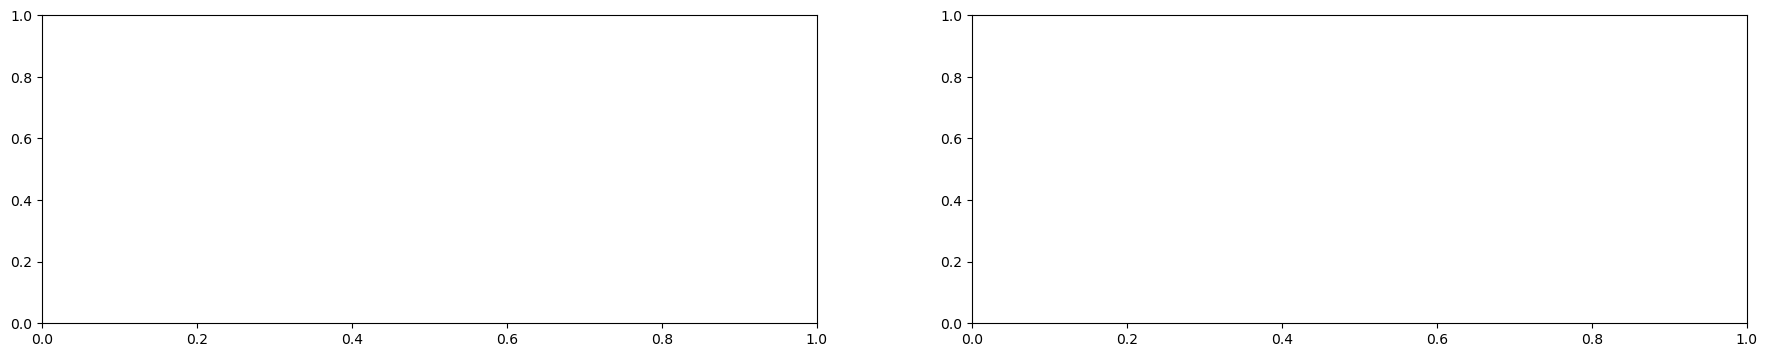

In [21]:

###################### Plotting train_val loss vs iterations #########################
fig, axs = plt.subplots(1,2, figsize=(22,4))

from_it = 0

axs[0].plot(model.history.history['loss'][from_it:])
axs[0].plot(model.history.history['val_loss'][from_it:])
axs[0].set_title('Learning curve')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Training iterations')
axs[0].legend(['Training set', 'Validation set'], loc='upper right')

axs[1].plot(model.history.history['r2'][from_it:])
axs[1].plot(model.history.history['val_r2'][from_it:])
axs[1].set_title('Learning curve')
axs[1].set_ylabel('r2')
axs[1].set_xlabel('Training iterations')
axs[1].legend(['Training set', 'Validation set'], loc='lower right')

plt.show()

In [25]:

#print(f"Train loss = {np.round(train_loss,decimals=5)}, Train accuracy = {np.round(train_acc, decimals=3)}")
#print(f"Dev loss = {np.round(dev_loss, decimals=5)}, Dev accuracy = {np.round(dev_acc, decimals=3)}")
#print(f"Test loss = {np.round(test_loss, decimals=5)}, Test accuracy = {np.round(test_acc, decimals=3)}")

print(f"Train loss = {np.round(train_loss,decimals=5)}")
print(f"Dev loss = {np.round(dev_loss, decimals=5)}")
print(f"Test loss = {np.round(test_loss, decimals=5)}")


Train loss = [0.09617 0.99986]
Dev loss = [0.09632 0.99945]
Test loss = [0.09622 0.99971]


### 椭球train

In [18]:
# 椭球训练集
train_data, train_para, val_data, val_para, test_data, test_para = split_data(ellipse_data_img,ellipse_para)
train_data.shape

(8957, 64, 64, 3)

In [19]:
test_para[0:9]

array([[        -10,          14,         1.2,        0.18,        0.09,        0.09,          30,           0,          90],
       [      -17.8,         6.2,         1.2,        0.22,        0.11,        0.11,          30,         120,          60],
       [      -22.6,           5,         1.2,        0.18,        0.09,        0.09,          90,          60,          30],
       [       24.8,        -8.8,         1.2,        0.22,        0.11,        0.11,          30,         120,          30],
       [      -21.4,         6.8,         1.6,        0.22,        0.11,        0.11,          60,         120,         120],
       [       13.4,        20.6,         1.2,        0.22,        0.11,        0.11,         150,          90,           0],
       [       18.8,        -8.2,         1.6,        0.26,        0.13,        0.13,         150,          30,         120],
       [       20.6,       -11.8,         1.2,        0.18,        0.09,        0.09,          90,         120,       

In [20]:
# 仅使用深度和半径参数
train_para,val_para,test_para = para_select(2,4,train_para,val_para,test_para)
train_para[:,1] = train_para[:,1]/2
val_para[:,1] = val_para[:,1]/2
test_para[:,1] = test_para[:,1]/2

In [21]:
test_para[0:9]

array([[        1.2,        0.09],
       [        1.2,        0.11],
       [        1.2,        0.09],
       [        1.2,        0.11],
       [        1.6,        0.11],
       [        1.2,        0.11],
       [        1.6,        0.13],
       [        1.2,        0.09],
       [          1,        0.09]])

In [22]:
Densenet_121 = tf.keras.applications.DenseNet121(
                                                include_top=False,  # 不包括全连接层, 可能主要用于提取特征, 而不分类
                                                weights="imagenet",  # 通过imagNet预训练
                                                input_tensor=None,
                                                input_shape=train_data.shape[1:],
                                                pooling=None,  # 不采用平均池化
                                                classes=1000, 
                                                )

# Densenet_121.summary()


In [23]:
nb_dense_block=0 
growth_rate=32
nb_filter=256
reduction=0.0
dropout_rate=0.0
weight_decay=1e-4

nb_layers = [6,12]

compression = 0.5

l2_regularizer = 0.005

####################

x = Densenet_121.layers[140].output

for block_idx in range(nb_dense_block):

  stage = block_idx+4
  x, nb_filter = dense_block(x, stage, nb_layers[block_idx], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

  # Add transition_block
  x = transition_block(x, stage, nb_filter, compression=compression, dropout_rate=dropout_rate, weight_decay=weight_decay)
  nb_filter = int(nb_filter * compression)

#final_stage = stage + 1
#x, nb_filter = dense_block(x, final_stage, nb_layers[-1], nb_filter, growth_rate, dropout_rate=dropout_rate, weight_decay=weight_decay)

x = GlobalAveragePooling2D(name='Global_Average_Pooling_2D')(x)

x = Dense(256, kernel_initializer='GlorotUniform', kernel_regularizer=l2(l2_regularizer))(x)
x = Activation("relu")(x)

x = Dense(train_para.shape[1], activation= "linear", name='rotation')(x)

model = Model(inputs = Densenet_121.input, outputs = x)

for layer in model.layers[:141]:
#for layer in position_model.layers[:9]:
  layer.trainable=True
for layer in model.layers[141:]:
#for layer in position_model.layers[9:]:
  layer.trainable=True

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 70, 70, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [24]:
model.compile(optimizer = Adam(learning_rate = 1e-5), 
              loss= MSE,
              metrics= [r2])

In [25]:
%%time

# 
path = 'content/my_Densenet_par_9_TL_ellipses_duanzhou.hdf5'

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode="min", patience=15, verbose=0)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(path, monitor="val_loss", verbose=0, save_best_only=True)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, mode="min",
                                                         patience=10, min_lr=0.00001, verbose=1)

####### Training #####
# train_data, train_para, val_data, val_para, test_data, test_para = split_data(dipole_data_img,dipole_para)

model.fit(train_data, train_para, validation_data=(val_data, val_para), batch_size=32, epochs=70, 
             callbacks=[earlystopping, reduce_lr, model_checkpoint])
                                                        


2024-05-15 00:12:50.438677: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2024-05-15 00:12:50.439304: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499780000 Hz


Epoch 1/70


2024-05-15 00:12:54.139001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2024-05-15 00:12:54.334095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2024-05-15 00:12:55.399554: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 84.14MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-15 00:12:55.404447: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 49.80MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2024-05-15 00:12:55.407913: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc)

ResourceExhaustedError:  OOM when allocating tensor with shape[32,224,16,16] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model/conv2_block5_concat/concat (defined at <timed exec>:14) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_20401]

Function call stack:
train_function


In [20]:
load_path = 'content/my_Densenet_par_9_TL_ellipses.hdf5'

best_model = load_model(load_path, custom_objects={'r2': r2})
best_model.summary()
best_model.compile(optimizer = Adam(learning_rate = 1e-5), 
              loss= MSE,
              metrics= [r2])

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [21]:
####### Evaluating test set ##########
train_loss= best_model.evaluate(train_data, train_para, verbose=0)

dev_loss= best_model.evaluate(val_data, val_para, verbose=0)
test_loss= best_model.evaluate(test_data, test_para, verbose=0)


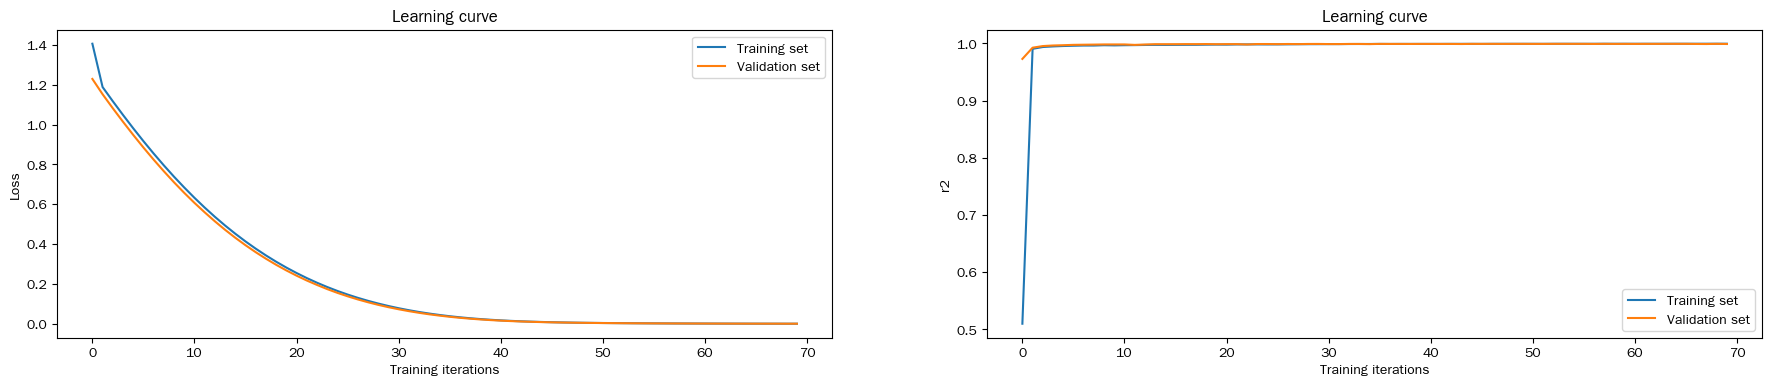

In [22]:

###################### Plotting train_val loss vs iterations #########################
fig, axs = plt.subplots(1,2, figsize=(22,4))

from_it = 0

axs[0].plot(model.history.history['loss'][from_it:])
axs[0].plot(model.history.history['val_loss'][from_it:])
axs[0].set_title('Learning curve')
axs[0].set_ylabel('Loss')
axs[0].set_xlabel('Training iterations')
axs[0].legend(['Training set', 'Validation set'], loc='upper right')

axs[1].plot(model.history.history['r2'][from_it:])
axs[1].plot(model.history.history['val_r2'][from_it:])
axs[1].set_title('Learning curve')
axs[1].set_ylabel('r2')
axs[1].set_xlabel('Training iterations')
axs[1].legend(['Training set', 'Validation set'], loc='lower right')

plt.show()

In [23]:
####### Predicting test set ##########

Parameters_predictions_norm = best_model.predict(test_data, verbose=0)



#Parameters_predictions_norm[:,2] = np.round(Parameters_predictions_norm[:,2], decimals = 1)


[          1        0.18        0.09]
[     1.0091     0.17055    0.084328]


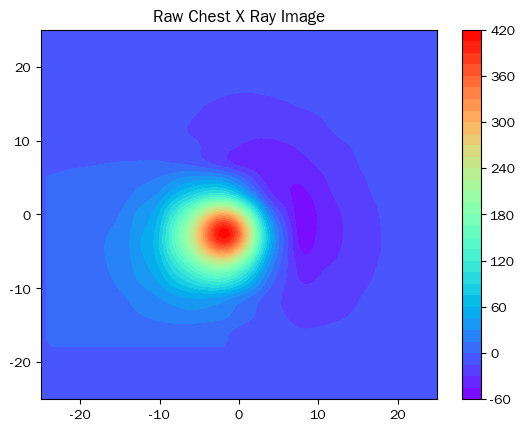

In [24]:
nn = np.random.randint(test_data.shape[0])

zmax= 64

conversion = (25*2)/zmax
map_lenght = 25

xmin = -map_lenght
xmax = map_lenght
ymin = -map_lenght
ymax = map_lenght

X = np.linspace(xmin, xmax, zmax)
Y = np.linspace(ymin, ymax, zmax)
sample_img = test_data[nn,:,:,0]
plt.contourf(X, Y, sample_img, levels = 40, cmap='rainbow')
plt.colorbar()
# plt.title()

print(test_para[nn])
print(Parameters_predictions_norm[nn])
